## Plot daily returns in a histogram

In [1]:
# The code below increases the size of the output screen...

In [2]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>

In [3]:
import os
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

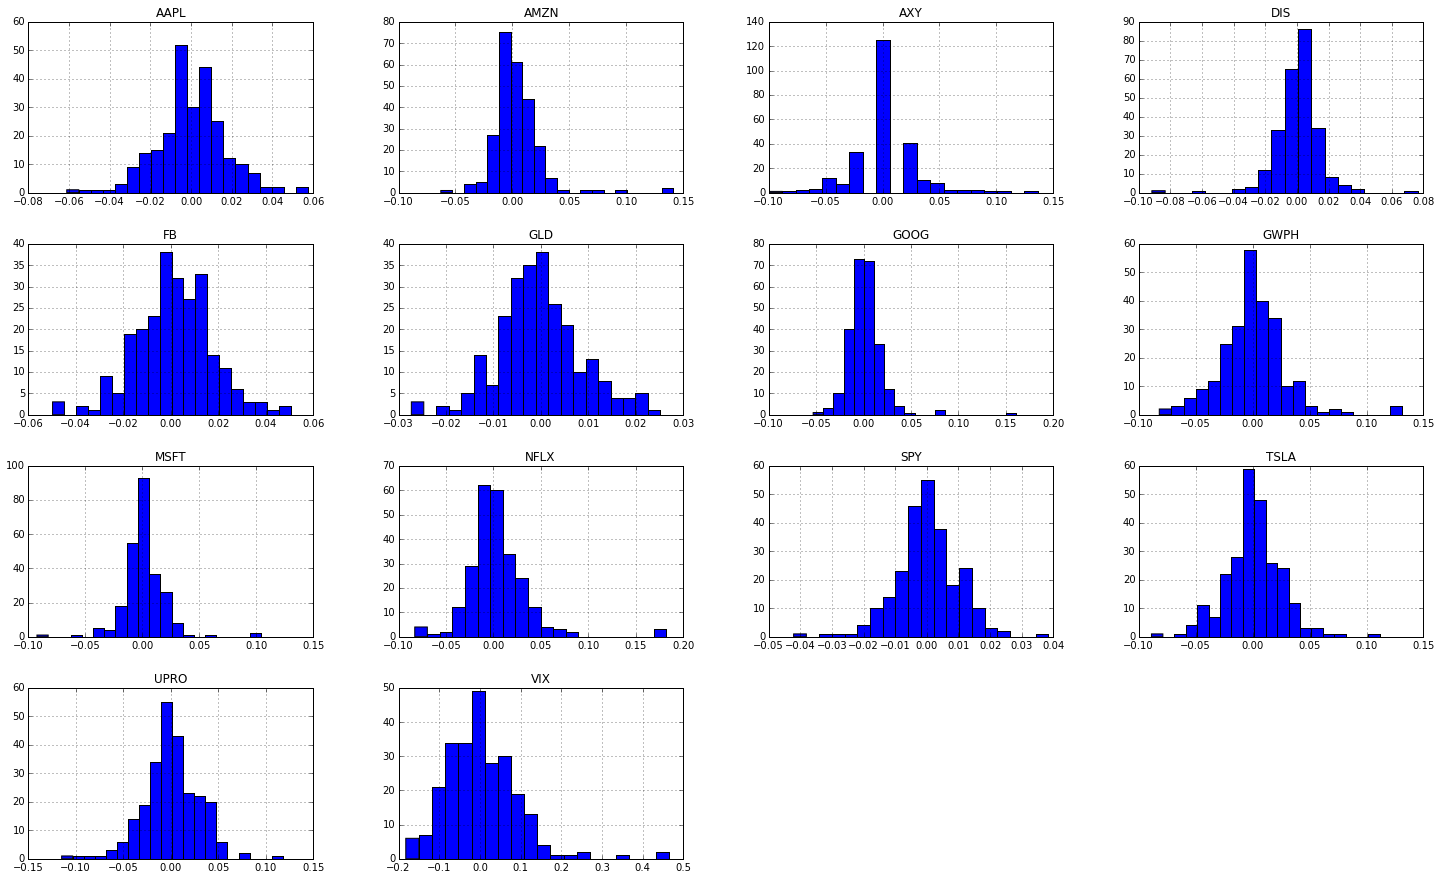

In [4]:
def symbol_to_path(symbol, base_dir="data"):
    return os.path.join(base_dir, "{}.csv".format(str(symbol)))


def get_data(symbols, dates):
    df = pd.DataFrame(index=dates)
    if 'SPY' not in symbols:  # add SPY for reference, if absent
        symbols.insert(0, 'SPY')

    for symbol in symbols:
        df_temp = pd.read_csv(symbol_to_path(symbol), index_col='Date',
                parse_dates=True, usecols=['Date', 'Adj Close'], na_values=['nan'])
        df_temp = df_temp.rename(columns={'Adj Close': symbol})
        df = df.join(df_temp)
        if symbol == 'SPY':  # drop dates SPY did not trade
            df = df.dropna(subset=["SPY"])

    return df


def plot_data(df, title="Stock prices", xlabel="Date", ylabel="Price"):
    ax = df.plot(title=title, fontsize=12, figsize=(20,5))
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    plt.show()


def compute_daily_returns(df):
    # daily_returns = df.copy()
    # daily_returns[1:] = (df[1:] / df[:-1].values) - 1
    # daily_returns.ix[0,:] = 0
    
    # Pandas
    daily_returns = (df/df.shift(1)) - 1
    daily_returns.ix[0,:] = 0
    
    return daily_returns


def daily_returns():
    # Read data
    dates = pd.date_range('2015-01-01', '2015-12-31')
    symbols = ['SPY','UPRO','GOOG','AAPL','AMZN','DIS','NFLX','FB','AXY','VIX','TSLA','GWPH','MSFT','GLD']
    df = get_data(symbols, dates)
    
    # fill empty trade dates (for AXY)
    df.fillna(method="ffill", inplace="True")
    df.fillna(method="bfill", inplace="True")
    
    # plot_data(df)

    # Compute daily returns
    daily_returns = compute_daily_returns(df)
    # plot_data(daily_returns, title="Daily returns", ylabel="Daily returns")
    
    # Plot histograme
    # daily_returns.hist(bins=20, layout=(3,1), figsize=(10,5))
    # daily_returns.hist(bins=20, layout=(3,1))
    daily_returns.hist(bins=20, figsize=(25,15))
    
    
if __name__ == "__main__":
    
    daily_returns()


Observations...
- Hard to compare histograms.  They don't line up well in the visuals.
- Next series of graphs will include multiple stocks in the same histogram for better comparisons.


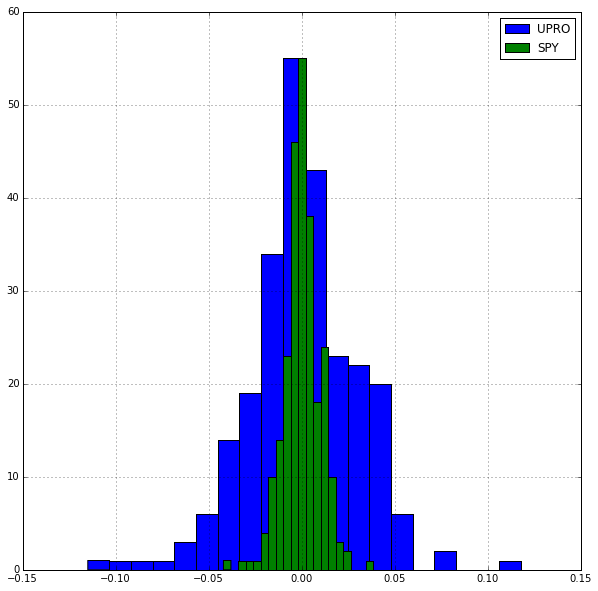

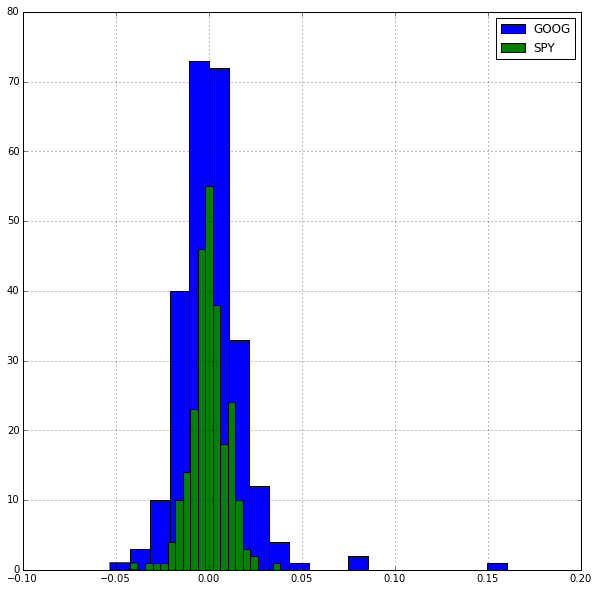

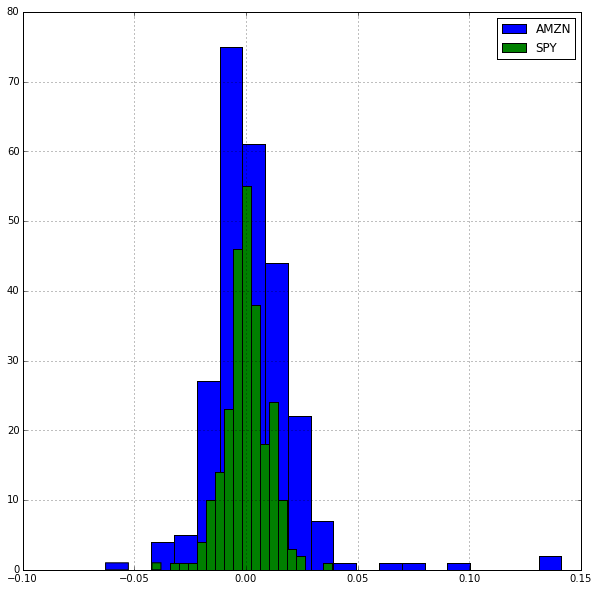

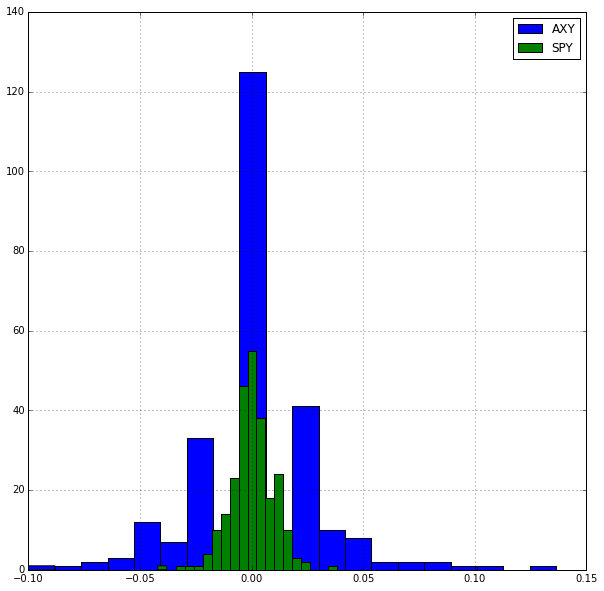

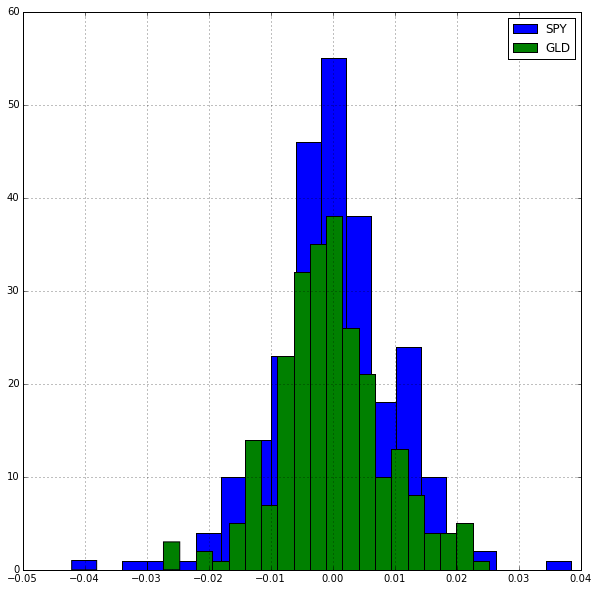

In [16]:
def symbol_to_path(symbol, base_dir="data"):
    return os.path.join(base_dir, "{}.csv".format(str(symbol)))


def get_data(symbols, dates):
    df = pd.DataFrame(index=dates)
    if 'SPY' not in symbols:  # add SPY for reference, if absent
        symbols.insert(0, 'SPY')

    for symbol in symbols:
        df_temp = pd.read_csv(symbol_to_path(symbol), index_col='Date',
                parse_dates=True, usecols=['Date', 'Adj Close'], na_values=['nan'])
        df_temp = df_temp.rename(columns={'Adj Close': symbol})
        df = df.join(df_temp)
        if symbol == 'SPY':  # drop dates SPY did not trade
            df = df.dropna(subset=["SPY"])

    return df


def plot_data(df, title="Stock prices", xlabel="Date", ylabel="Price"):
    ax = df.plot(title=title, fontsize=12, figsize=(20,5))
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    plt.show()


def compute_daily_returns(df):
    daily_returns = (df/df.shift(1)) - 1
    daily_returns.ix[0,:] = 0
    
    return daily_returns


def daily_returns():
    # Read data
    dates = pd.date_range('2015-01-01', '2015-12-31')
    # symbols = ['SPY','UPRO','GOOG','AAPL','AMZN','DIS','NFLX','FB','AXY','VIX','TSLA','GWPH','MSFT','GLD']
    symbols = ['SPY','UPRO','GOOG','AAPL','AMZN','DIS','NFLX','FB','AXY','VIX','TSLA','GWPH','MSFT','GLD']
    df = get_data(symbols, dates)
    
    # fill empty trade dates (for AXY)
    df.fillna(method="ffill", inplace="True")
    df.fillna(method="bfill", inplace="True")
    
    # plot_data(df)

    # Compute daily returns
    daily_returns = compute_daily_returns(df)
    # plot_data(daily_returns, title="Daily returns", ylabel="Daily returns")
    
    # Plot histograms
    daily_returns['UPRO'].hist(bins=20, figsize=(10,10), label="UPRO")
    daily_returns['SPY'].hist(bins=20, figsize=(10,10), label="SPY")
    plt.legend(loc='upper right')
    plt.show()
    
    daily_returns['GOOG'].hist(bins=20, figsize=(10,10), label="GOOG")
    daily_returns['SPY'].hist(bins=20, figsize=(10,10), label="SPY")
    plt.legend(loc='upper right')
    plt.show()
    
    daily_returns['AMZN'].hist(bins=20, figsize=(10,10), label="AMZN")
    daily_returns['SPY'].hist(bins=20, figsize=(10,10), label="SPY")
    plt.legend(loc='upper right')
    plt.show()
    
    daily_returns['AXY'].hist(bins=20, figsize=(10,10), label="AXY")
    daily_returns['SPY'].hist(bins=20, figsize=(10,10), label="SPY")
    plt.legend(loc='upper right')
    plt.show()
    
    daily_returns['SPY'].hist(bins=20, figsize=(10,10), label="SPY")
    daily_returns['GLD'].hist(bins=20, figsize=(10,10), label="GLD")
    plt.legend(loc='upper right')
    plt.show()
    
if __name__ == "__main__":
    
    daily_returns()